In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [2]:
#loading the dataset
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
#displaying the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Determine whether a student has passed or failed based on their average score across math, reading, and writing. A new column is created using a predefined threshold to categorize students as pass or fail.

In [4]:
#average_score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
#threshold to determine pass or fail
threshold = 50
#grade column is based on whether the average_score is greater or less than 50
df['grade'] = df['average_score'].apply(lambda x: 'pass' if x >= threshold else 'fail')
#display dataframe
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,fail
4,male,group C,some college,standard,none,76,78,75,76.333333,pass
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,pass
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,pass
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,pass
998,female,group D,some college,standard,completed,68,78,77,74.333333,pass


In [5]:
df.shape

(1000, 10)

In [6]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average_score                1000 non-null   float64
 9   grade                        1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


#### The dataset contains 1,000 students, with 8 columns. The numerical columns are the math, reading, and writing scores, and the rest are categorical features like gender, race, and parental education.

## Data Cleaning

#### The dataset shows no missing values since every columns show full non-null count.

In [7]:
#checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
grade                          0
dtype: int64

#### There are no missing values in the dataset

In [8]:
#checking for duplicated values
df.duplicated().sum()

0

#### There are no duplicated values

In [9]:
 #Unique values in the categorical columns
for col in ['gender', 'race/ethnicity', 'parental level of education', 'grade']:
    print(f"Unique values in {col} column:", df[col].unique())

Unique values in gender column: ['female' 'male']
Unique values in race/ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental level of education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in grade column: ['pass' 'fail']


In [10]:
df.describe()

,math score,reading score,writing score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


* #### Reading scores have the highest average (69.17), followed by writing (68.05) and math (66.09).


* #### The spread of scores (standard deviation) is similar across all subjects.


* #### Scores range from 0 to 100 in all subjects, with a significant number of students performing at both ends of the scale.


* #### The middle 50% of students scored between 57 and 77 in math, 59 and 79 in reading, and 57.75 and 79 in writing.

## Exploratory Data Analysis

### Univariate Analysis

##### Numerical Columns

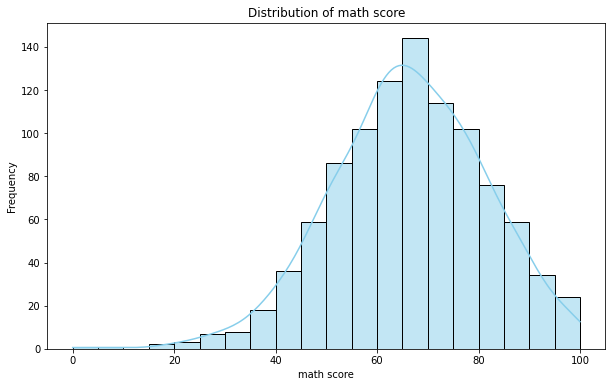

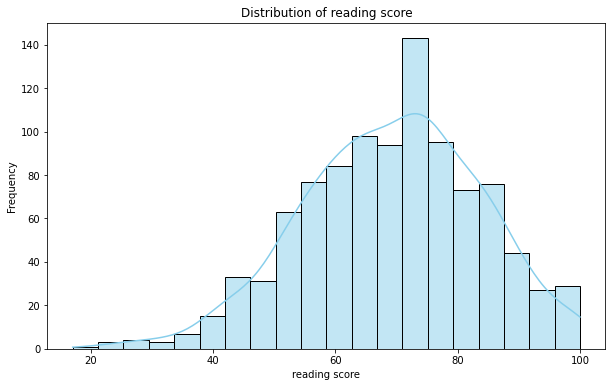

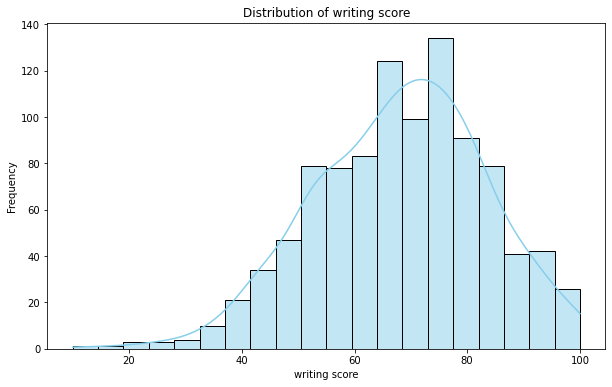

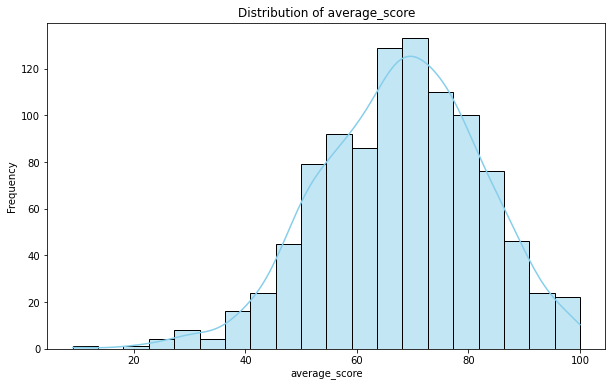

In [11]:
#numerical columns
numerical_columns = ['math score', 'reading score', 'writing score', 'average_score']

# Looping through numerical columns to plot the distribution
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.savefig(f'{column}_distribution.png', dpi = 300,bbox_inches = 'tight')
    plt.show();
    

All the score distributions are slightly left-skewed, indicating that most students scored on the higher end. This suggests that, on average, students performed well in each subject. Also, it’s noticeable that more students achieved perfect scores in reading and writing compared to math.

#### Checking for outliers
#### Boxplots are used to check for outliers

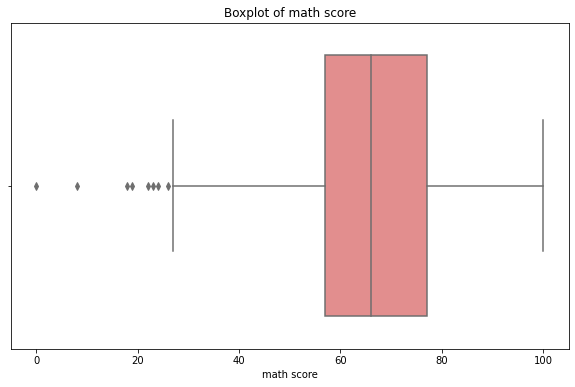

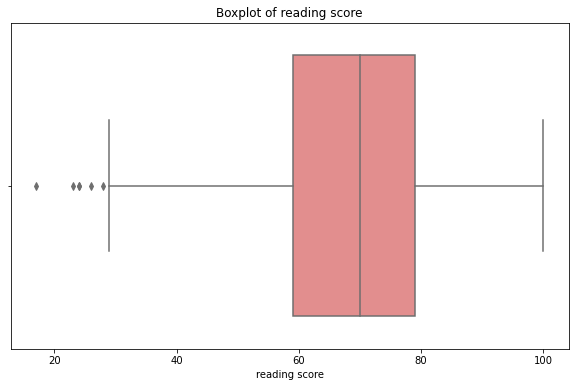

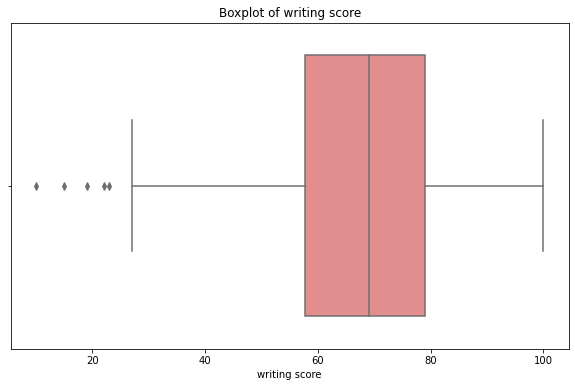

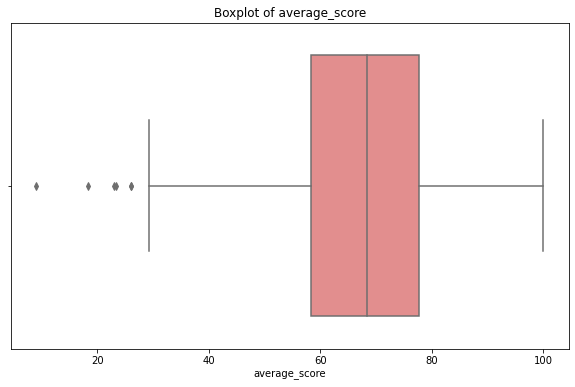

In [12]:
for column in numerical_columns:
    # figure for each boxplot
    plt.figure(figsize=(10, 6))
    #boxplot for the current column
    sns.boxplot(x=df[column], color='lightcoral')
    # Add a title to the boxplot
    plt.title(f'Boxplot of {column}')
    # Label the x-axis
    plt.xlabel(column)
    #saving boxplot with a unique filename for each column
    plt.savefig(f'boxplot_{column}.png', dpi=300) 
    # Show the boxplot
    plt.show();




#### Some scores appear as outliers in the boxplot, but since exam scores range from 0 to 100, these values are valid and not unusual in  these context.

#### Correlation Heatmap
Plotting the correlation heatmap to examine the relationships between the numerical features. This will help us understand which variables are highly correlated with each other guiding our feature selection process.

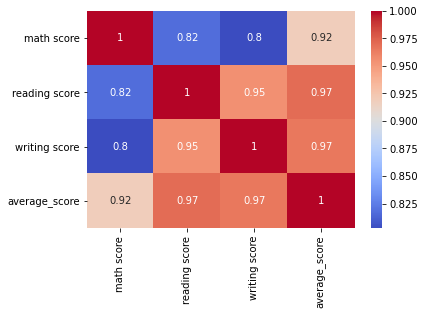

In [13]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('heatmap.png', dpi=300) 
plt.show()

All scores are strongly positively correlated. Average score has the highest correlation with reading and writing scores 0.97

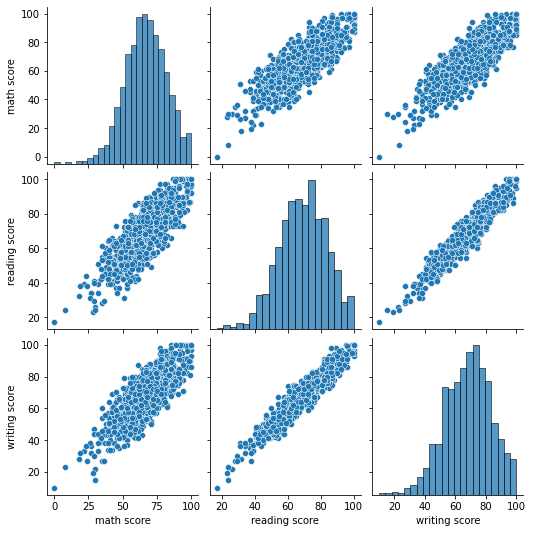

In [14]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.savefig('pairplot.png', dpi=300) 
plt.show()

The pairplot shows strong positive linear relationships between math, reading, and writing scores. This confirms high correlation among them, supporting the decision to either use individual scores or average_score to avoid multicollinearity.

### Categorical Columns

### Distribution of the Categorical Columns

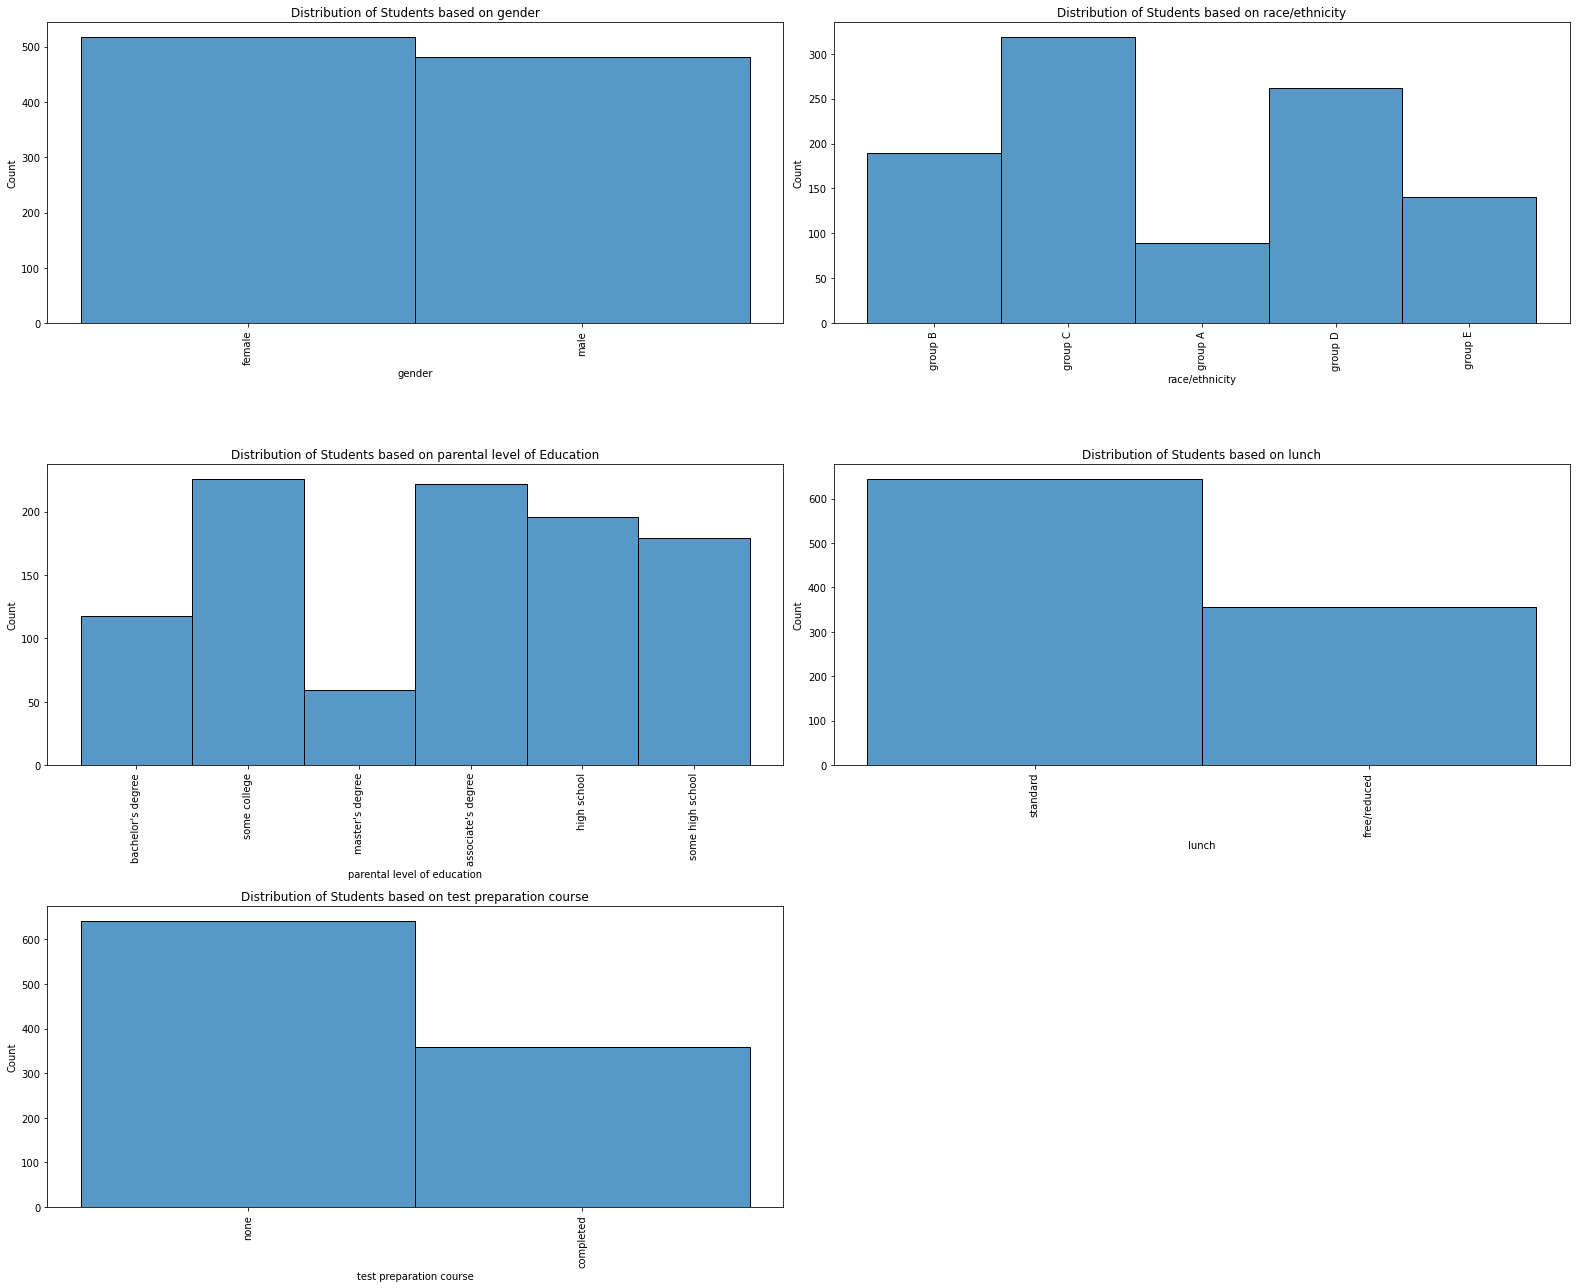

In [15]:
#a figure with 4 subplots
fig, axes = plt.subplots(3, 2, figsize=(22, 18))

# bar plot of gender type
sns.histplot(data=df, x="gender", ax=axes[0][0])
axes[0][0].set_title('Distribution of Students based on gender')
axes[0][0].tick_params(axis='x', rotation=90)

# bar plot of race/ethnicity type
sns.histplot(data=df, x="race/ethnicity", ax=axes[0][1])
axes[0][1].set_title('Distribution of Students based on race/ethnicity')
axes[0][1].tick_params(axis='x', rotation=90)

#bar plot of Parental level of education
sns.histplot(data=df, x="parental level of education", ax=axes[1][0])
axes[1][0].set_title('Distribution of Students based on parental level of Education')
axes[1][0].tick_params(axis='x', rotation=90)

# bar plot of lunch type
sns.histplot(data=df, x="lunch", ax=axes[1][1])
axes[1][1].set_title('Distribution of Students based on lunch')
axes[1][1].tick_params(axis='x', rotation=90)

# bar plot of test preparation course type
sns.histplot(data=df, x="test preparation course", ax=axes[2][0])
axes[2][0].set_title('Distribution of Students based on test preparation course')
axes[2][0].tick_params(axis='x', rotation=90)
# Hide the unused subplot (bottom right)
fig.delaxes(axes[2][1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

* Most of the students come from ethnic group C and D.
* Ethnic group A and E have the least number of students
* Student's education seems to vary only master's degree,bachelor’s degree, have the least number of students
* Most students have not taken the test poreparation course.
* The proportion of female students and male students is balanced.
* Most students have a standard lunch type.

## Univariate Analysis

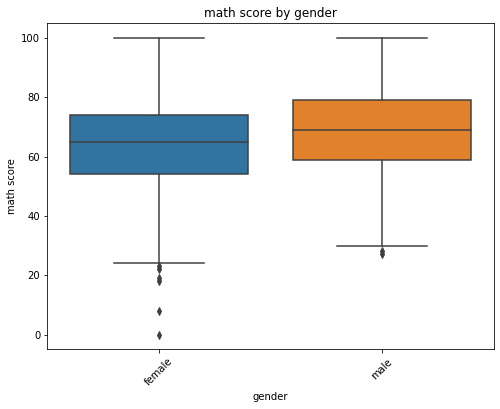

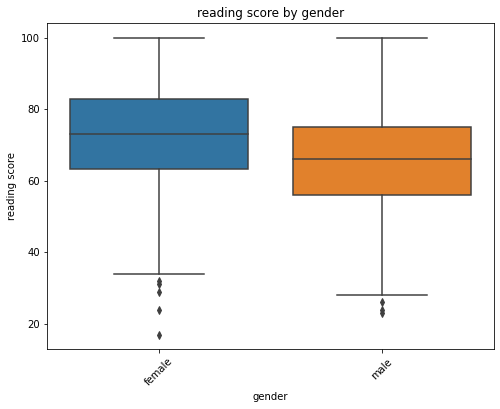

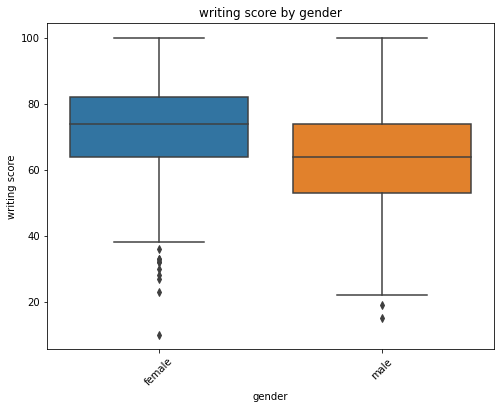

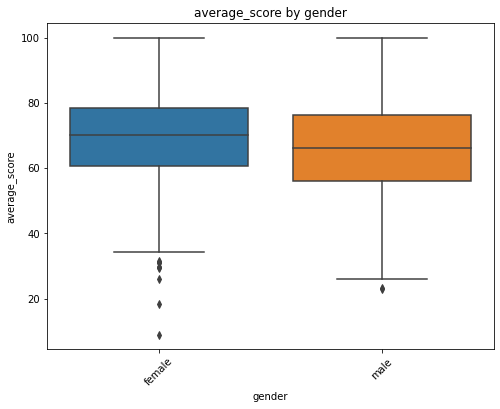

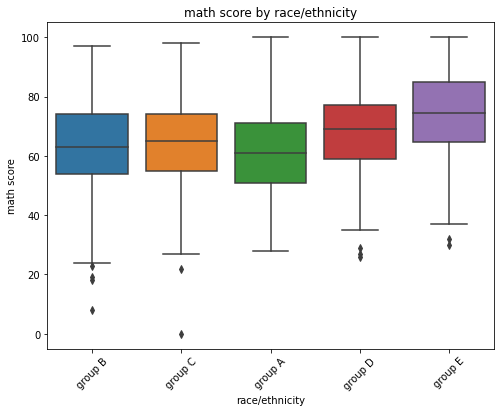

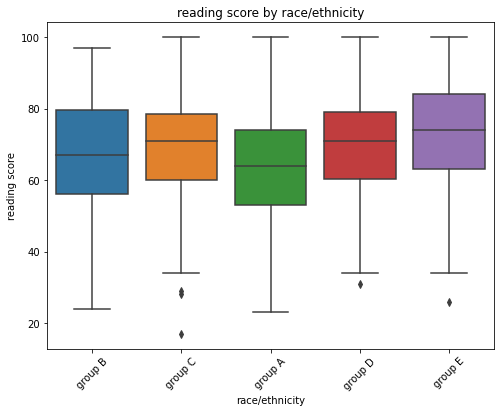

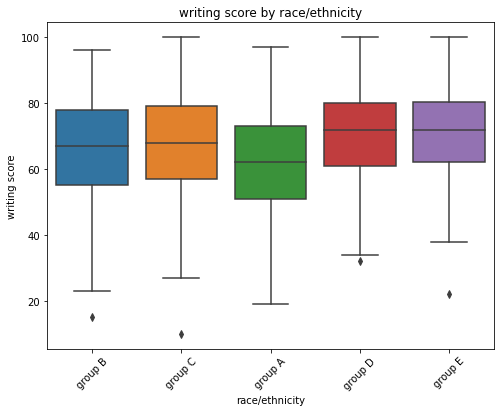

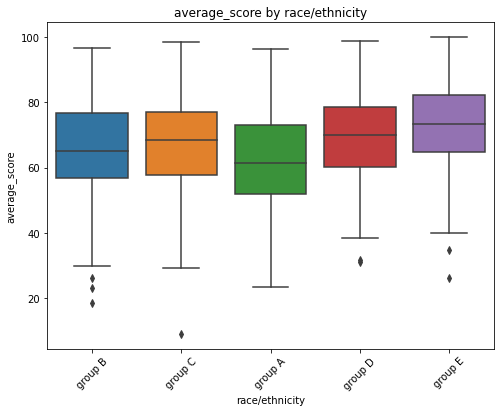

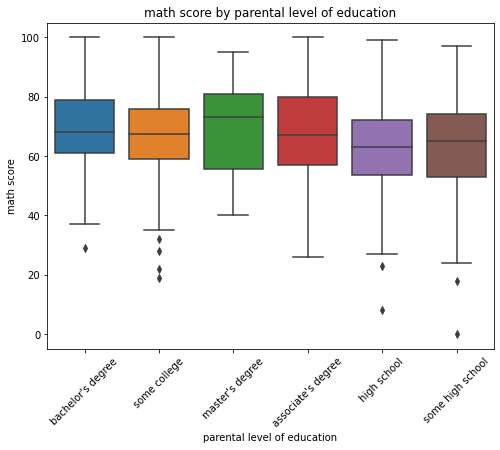

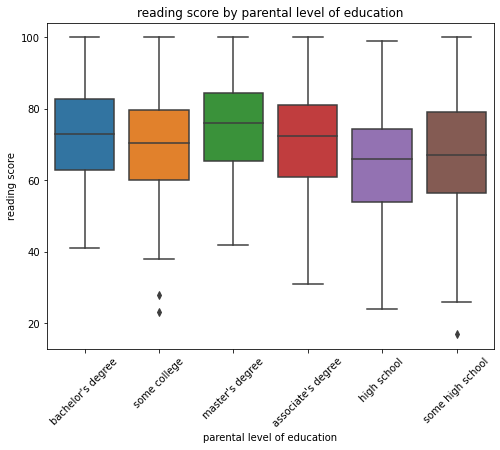

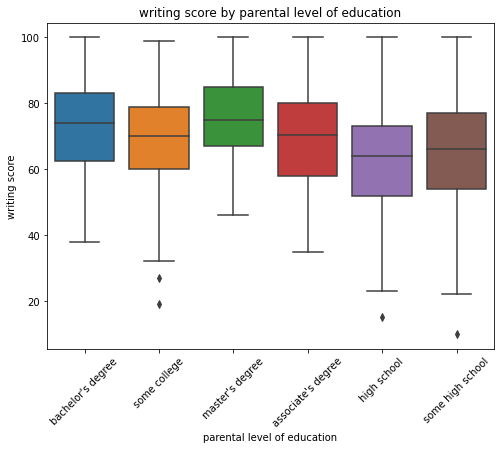

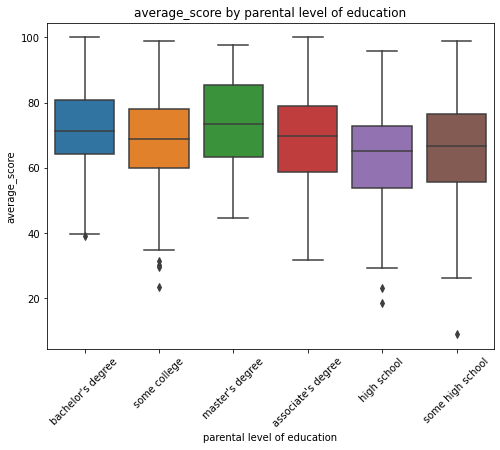

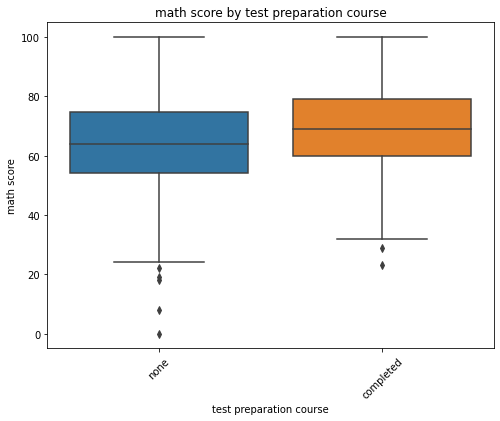

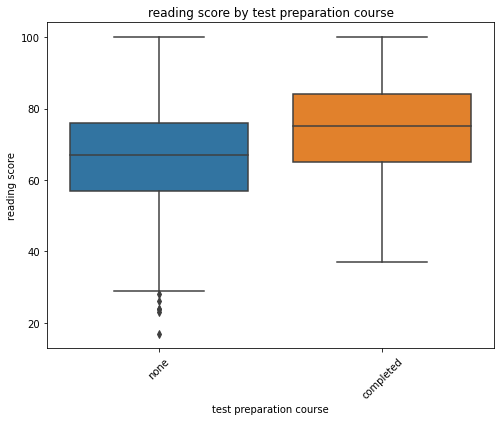

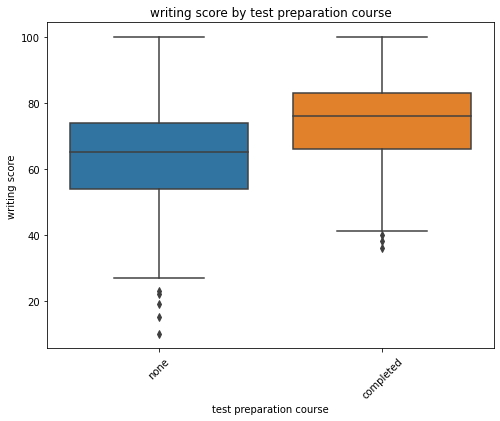

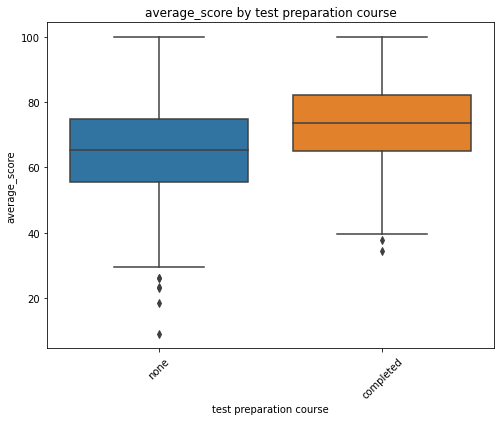

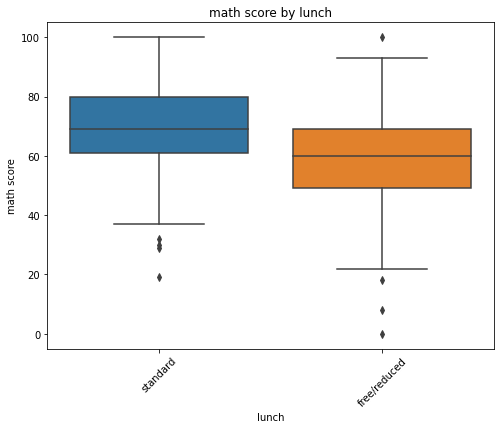

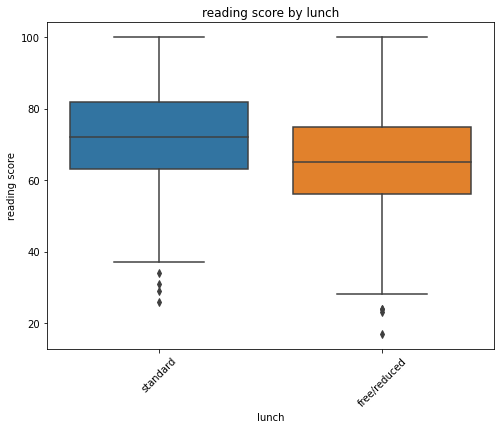

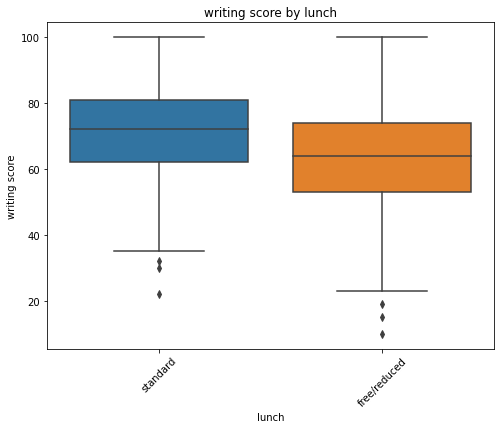

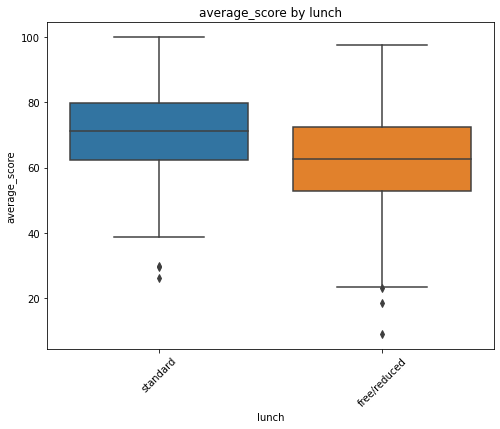

In [16]:
# List of categorical columns
cat_columns = ['gender', 'race/ethnicity', 'parental level of education', 'test preparation course', 'lunch']
# List of numerical columns
scores = ['math score', 'reading score', 'writing score', 'average_score']

def plot_boxplot(data, cat_col, numerical_col):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cat_col, y=numerical_col, data=data)
    plt.title(f'{numerical_col} by {cat_col}')
    plt.xticks(rotation=45)  
    plt.show()




# Loop through the categorical columns and score columns
for cat_col in cat_columns:
    for score in scores:
        plot_boxplot(df, cat_col, score)

#### Gender
* Female student seems to have a good performance in writing and reading, while male student has a good performance in math

* There’s no male student gets 0 score on all exams, while there are female students who get 0 score in math

#### Ethnic Group

*Ethnic Group E**: Students from this group tend to perform well in all subjects, with particularly strong performance in math.

- **Ethnic Group D**: In writing, students from ethnic group D show a level of performance that can compete with ethnic group E.

- **Ethnic Group A**: Students in ethnic group A generally have lower performance across all subjects when compared to other groups.

- **Ethnic Group C**: The students from this ethnic group are the only ones who scored 0 on the math exam.
- **Ethnic Group D**: Students from this group consistently have the lowest grades in every subject.

#### Parental Education
**Parental Education Level and Student Performance**

Students whose parents hold master's or bachelor's degrees often excel in all subjects.

**Impact of High School Education**

Students with parents who have only completed high school tend to have lower academic performance.

**Influence of Advanced Parental Education**

Children whose parents have education beyond high school consistently achieve high scores across all exams.

#### Preparation Test Course

* Student who completed the test preparation course seems to have better performance in all of the exams compared to those who don’t

* Significant differences in performance occurred in the writing and reading

#### Lunch

* Students who tend to have a standard type of lunch they seen to perfom better especially in maths.


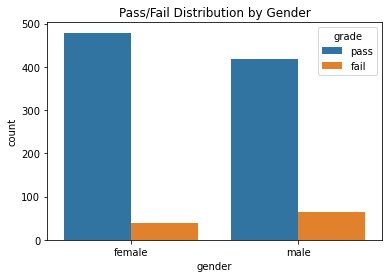

In [17]:
# Countplot for Grade by Gender
sns.countplot(x='gender', hue='grade', data=df)
plt.title('Pass/Fail Distribution by Gender')
plt.show()

* The females have the best performance compared to males and slso the males fail more than the female

#### The pairplot shows math, reading, and writing scores are strongly correlated. To avoid multicollinearity in logistic regression, I’ll use average_score instead of all three.

## Modeling

In [18]:
final_df = df[['gender','race/ethnicity','parental level of education','lunch','test preparation course','average_score','grade']]

In [19]:
final_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score,grade
0,female,group B,bachelor's degree,standard,none,72.666667,pass
1,female,group C,some college,standard,completed,82.333333,pass
2,female,group B,master's degree,standard,none,92.666667,pass
3,male,group A,associate's degree,free/reduced,none,49.333333,fail
4,male,group C,some college,standard,none,76.333333,pass
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94.000000,pass
996,male,group C,high school,free/reduced,none,57.333333,pass
997,female,group C,high school,free/reduced,completed,65.000000,pass
998,female,group D,some college,standard,completed,74.333333,pass


### Convert categorical features to be one-hot encoded


In [20]:
# Mapping target variable 'grade' to numeric
final_df.loc[:,'grade'] = final_df['grade'].map({'pass': 1, 'fail': 0})

C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [21]:
final_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score,grade
0,female,group B,bachelor's degree,standard,none,72.666667,1
1,female,group C,some college,standard,completed,82.333333,1
2,female,group B,master's degree,standard,none,92.666667,1
3,male,group A,associate's degree,free/reduced,none,49.333333,0
4,male,group C,some college,standard,none,76.333333,1
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94.000000,1
996,male,group C,high school,free/reduced,none,57.333333,1
997,female,group C,high school,free/reduced,completed,65.000000,1
998,female,group D,some college,standard,completed,74.333333,1


In [22]:
#Features and Target Column
X = final_df.drop('grade', axis = 1)
y = final_df['grade']

In [23]:
#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [24]:
# feature columns and numerical columns
num_col = ['average_score']  
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 
preprocessor = ColumnTransformer(
       transformers = [
           #apply standard scaling
           ('num', StandardScaler(), num_col),
           #apply one_hot encoding to categorical features
           ('cat', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), cat_cols)
       ])


In [25]:
#creating a pipeline with preprocessing steps and logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [26]:
#training the model
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['average_score']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'race/ethnicity',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation '
                                                   'course'])])),
                ('classifier', LogisticRegression())])

#### Evaluation of the Model

In [27]:
#predictions on the training data
y_train_pred = model.predict(X_train)
#predictions on the test data
y_pred = model.predict(X_test)
#accuracy score 
test_accuracy = accuracy_score(y_test,y_pred)
print(f"Test Accuracy: {test_accuracy}")

#the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Test Accuracy: 0.98
Training Accuracy: 0.9925


### Model Performance

- **Test Accuracy**: 98%
- **Training Accuracy**: 99.25%

### Interpretation:
- The model performs very well on both the training and test sets, with a small difference in accuracy.
- The **slightly higher training accuracy** (99.25%) compared to test accuracy (98%) suggests that the model might be slightly overfitting, though the difference is minimal.
- The model generalizes well, as evidenced by the high test accuracy, indicating it is able to make accurate predictions on unseen data.

### Cross-Validation to Check for Overfitting

To ensure that our model is not overfitting,  **cross-validation** is performed. Cross-validation splits the dataset into multiple subsets (folds), and the model is trained and evaluated on each fold. This provides a more reliable estimate of the model's performance on unseen data.

In [28]:
# cross-validation (using 5 folds here)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

#  cross-validation scores for each fold
print(f"Cross-Validation Accuracy Scores: {cv_scores}")

# the mean and standard deviation of the cross-validation scores
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

Cross-Validation Accuracy Scores: [0.975 0.97  0.995 0.995 0.985]
Mean Cross-Validation Accuracy: 0.984



### Interpretation:
- The model has high and consistent performance across all folds, with an average accuracy of 98.4%.


In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# F1-Score (harmonic mean of precision and recall)
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
[[ 23   4]
 [  0 173]]
F1-Score: 0.9886


From this confusion matrix, the model performs well, with only 4 false positives, meaning the model only occasionally mispredicts students who fail as passing.

F1-Score: 0.9886

The F1-Score is the harmonic mean of precision and recall. An F1-Score of 0.9886 indicates a very high balance between precision and recall, suggesting that the model is performing well in terms of both correctly identifying students who pass and minimizing false positives and false negatives.